In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
## Opening the file to read in the form of .csv

df = pd.read_csv("RTA Dataset.csv")

In [3]:
## converting the csv in the form of dataset

df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [4]:
##Lets see this in the form of the numerical summary

df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [5]:
df = df.iloc[:,1:]

In [6]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [7]:
df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

In [8]:
df["Educational_level"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12311     True
12312    False
12313    False
12314    False
12315    False
Name: Educational_level, Length: 12316, dtype: bool

In [9]:
df.isnull().sum().sum()

20057

In [10]:
df["Educational_level"] = df["Educational_level"].fillna(df["Educational_level"].mode()[0])
df["Vehicle_driver_relation"] = df["Vehicle_driver_relation"].fillna(df["Vehicle_driver_relation"].mode()[0]) 
df["Driving_experience"] = df["Driving_experience"].fillna(df["Driving_experience"].mode()[0]) 
df["Type_of_vehicle"] = df["Type_of_vehicle"].fillna(df["Type_of_vehicle"].mode()[0]) 
df["Owner_of_vehicle"] = df["Owner_of_vehicle"].fillna(df["Owner_of_vehicle"].mode()[0])
df["Service_year_of_vehicle"] = df["Service_year_of_vehicle"].fillna(df["Service_year_of_vehicle"].mode()[0])
df["Defect_of_vehicle"] = df["Defect_of_vehicle"].fillna(df["Defect_of_vehicle"].mode()[0])
df["Area_accident_occured"] = df["Area_accident_occured"].fillna(df["Area_accident_occured"].mode()[0])
df["Lanes_or_Medians"] = df["Road_allignment"].fillna(df["Road_allignment"].mode()[0])
df["Road_allignment"] = df["Lanes_or_Medians"].fillna(df["Lanes_or_Medians"].mode()[0])
df["Types_of_Junction"] = df["Types_of_Junction"].fillna(df["Types_of_Junction"].mode()[0])
df["Road_surface_type"] = df["Road_surface_type"].fillna(df["Road_surface_type"].mode()[0])
df["Type_of_collision"] = df["Type_of_collision"].fillna(df["Type_of_collision"].mode()[0])
df["Vehicle_movement"] = df["Vehicle_movement"].fillna(df["Vehicle_movement"].mode()[0])
df["Work_of_casuality"] = df["Work_of_casuality"].fillna(df["Work_of_casuality"].mode()[0])
df["Fitness_of_casuality"] = df["Fitness_of_casuality"].fillna(df["Fitness_of_casuality"].mode()[0])

In [11]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [12]:
## After the loading of the data we need to perform the Profiling of the Dataset

df.describe()
profiler = ProfileReport(df)

In [13]:
profiler

In [12]:
## Now seggregating the data in the form of labels for x and y

df.corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


In [13]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [14]:
df.dropna()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [15]:
df.shape

(12316, 31)

In [16]:
## Drop the rows containing duplicate data



In [17]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [18]:
df.count()

Day_of_week                    12316
Age_band_of_driver             12316
Sex_of_driver                  12316
Educational_level              12316
Vehicle_driver_relation        12316
Driving_experience             12316
Type_of_vehicle                12316
Owner_of_vehicle               12316
Service_year_of_vehicle        12316
Defect_of_vehicle              12316
Area_accident_occured          12316
Lanes_or_Medians               12316
Road_allignment                12316
Types_of_Junction              12316
Road_surface_type              12316
Road_surface_conditions        12316
Light_conditions               12316
Weather_conditions             12316
Type_of_collision              12316
Number_of_vehicles_involved    12316
Number_of_casualties           12316
Vehicle_movement               12316
Casualty_class                 12316
Sex_of_casualty                12316
Age_band_of_casualty           12316
Casualty_severity              12316
Work_of_casuality              12316
F

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [20]:
## Removing the unwanted symbols - , *,?,#,etc


for col in df.columns:
    print("{} : {}".format(col,df[col].unique()))

Day_of_week : ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver : ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver : ['Male' 'Female' 'Unknown']
Educational_level : ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation : ['Employee' 'Unknown' 'Owner' 'Other']
Driving_experience : ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
Type_of_vehicle : ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle : ['Owner' 'Governmental' 'Organization' 'Other']
Service_year_of_vehicle : ['Above 10yr' '5-10yrs' 'Unknown' '1-2yr' '2-5yrs' 'Below 1yr']
Defect_of_vehicle : ['No defect' '7' '5']
Area_accident_occured : ['Re

In [21]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [22]:
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

<AxesSubplot:>

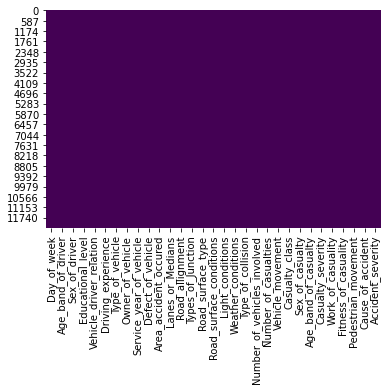

In [23]:
## Visualizing the missing values

sns.heatmap(df.isnull(),cbar = False, cmap='viridis')

<AxesSubplot:>

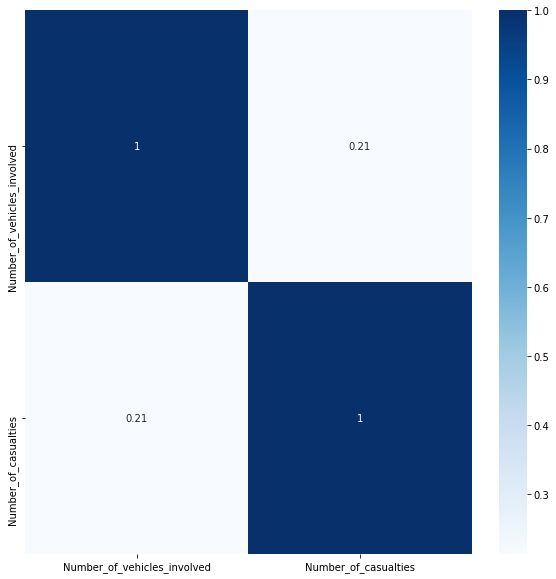

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar = True,annot = True,cmap = "Blues" )

In [25]:
## How does nos of casualties is affecting the Accident_severity
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [26]:
df.describe()  ## only integer features no categorical features

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [27]:
## We need to find the relationship between the features
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [28]:
pd.get_dummies(df["Sex_of_driver"])

,Female,Male,Unknown
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
12311,0,1,0
12312,0,1,0
12313,0,1,0
12314,1,0,0


In [29]:
##Converting gender to 0 and 1

df["Sex_of_driver"] = df["Sex_of_driver"].map({'Female':0, 'Male':1})

In [30]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,1.0,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,1.0,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,1.0,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,1.0,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,1.0,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [31]:
## Create a different type of dataset which is only for catagorical features

df_cat = df.select_dtypes(include="object").copy()
df_cat.head()

,Day_of_week,Age_band_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,Industrial areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [32]:
## Picking one categorical feature one by one and then applying on the dataframe

df_cat["Day_of_week"].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [33]:
len(df_cat["Day_of_week"].unique())

7

In [34]:
df_cat["Day_of_week"].isnull().sum()

0

<AxesSubplot:xlabel='Day_of_week', ylabel='count'>

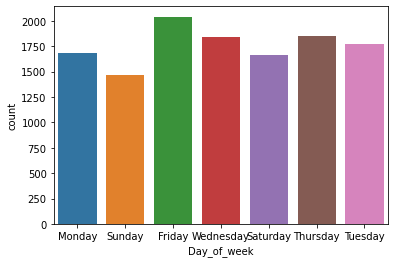

In [35]:
## performing the Countplot

sns.countplot(data = df_cat, x = "Day_of_week")

In [36]:
## now plotting the relationship between the dependent variable and the independent variable

df_cat["Number_of_vehicles_involved"] = df.loc[df_cat.index, "Number_of_vehicles_involved"].copy()

In [39]:
## Now plotting the boxplot with respect to the two variables


In [38]:
df_cat["Age_band_of_driver"].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [44]:
##pd.get_dummies(df["Age_band_of_driver"])
## We can map the age range in terms of ratings 

df_cat["Age_band_of_driver"] = df_cat["Age_band_of_driver"].map({"18-30" : 1, "31-50" : 2, "Over 51" : 3, "Unknown" : 4})

In [45]:
df_cat

,Day_of_week,Age_band_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Number_of_vehicles_involved
0,Monday,1.0,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,2
1,Monday,2.0,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,2
2,Monday,1.0,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,Recreational areas,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,2
3,Sunday,1.0,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,Office areas,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2
4,Sunday,1.0,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,Industrial areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,2.0,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,Outside rural areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,2
12312,Sunday,4.0,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Outside rural areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,2
12313,Sunday,3.0,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,1
12314,Sunday,1.0,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,2
